
LIANG Jing from IEDA




# Introduction of idea

In the basic linear regression model, gender is assumed to affect height linearly. However, according to research by Cole or Tanner, the influence of gender on height is not linear but rather exhibits a more complex relationship with parental heights.

To avoide using a much more complex model,
I attempt to split the data by gender and construct separate linear regression models to predict the heights of boys and girls, respectively.


# Code


In [19]:

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

current_dir = Path(".").resolve()
file_path = current_dir / "data" / "GaltonFamilies.csv"

# Get the data
GaltonFamilies = pd.read_csv(file_path)
GaltonFamilies.head()


,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [20]:

# Prepare the data
GaltonFamilies = pd.get_dummies(GaltonFamilies, columns=['gender'], prefix='gender', drop_first=True)
features = ['father','mother','midparentHeight','gender_male']
target = 'childHeight'

X = GaltonFamilies[features]
y = GaltonFamilies[target]


In [21]:

# Single linear regression model
np.random.seed(10)
nrep = 100
MSE_whole = np.zeros(nrep)

for rep in range(nrep):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rep)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE_whole[rep] = mean_squared_error(y_test, y_pred)

mean_mse_whole = MSE_whole.mean()
std_mse_whole = MSE_whole.std()
print(f"Single linear regression MSE = {mean_mse_whole:.4f} ± {std_mse_whole:.4f}")


Single linear regression MSE = 4.8273 ± 0.5152


In [22]:

# gender-seprated linear regression model
MSE_gender = np.zeros(nrep)
male_data = GaltonFamilies[GaltonFamilies['gender_male'] == 1]
female_data = GaltonFamilies[GaltonFamilies['gender_male'] == 0]

features = ['father','mother','midparentHeight']

for rep in range(nrep):
    n_male_train = int(len(male_data) * 0.8)
    n_female_train = int(len(female_data) * 0.8)

    male_train_idx = np.random.choice(len(male_data), n_male_train, replace=False)
    female_train_idx = np.random.choice(len(female_data), n_female_train, replace=False)

    male_train = male_data.iloc[male_train_idx]
    male_test = male_data.drop(male_data.index[male_train_idx])
    female_train = female_data.iloc[female_train_idx]
    female_test = female_data.drop(female_data.index[female_train_idx])

    model_male = LinearRegression()
    model_male.fit(male_train[features], male_train[target])
    model_female = LinearRegression()
    model_female.fit(female_train[features], female_train[target])

    male_pred = model_male.predict(male_test[features])
    female_pred = model_female.predict(female_test[features])

    all_true = pd.concat([male_test[target], female_test[target]])
    all_pred = np.concatenate([male_pred, female_pred])

    MSE_gender[rep] = mean_squared_error(all_true, all_pred)

mean_mse_gender = MSE_gender.mean()
std_mse_gender = MSE_gender.std()
print(f"Gender seprated linear regression MSE = {mean_mse_gender:.4f} ± {std_mse_gender:.4f}")


Gender seprated linear regression MSE = 4.6750 ± 0.4175


/var/folders/s9/dwmbdjrn0rsdf992gy9545_m0000gn/T/ipykernel_9328/1417547387.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=box_labels)


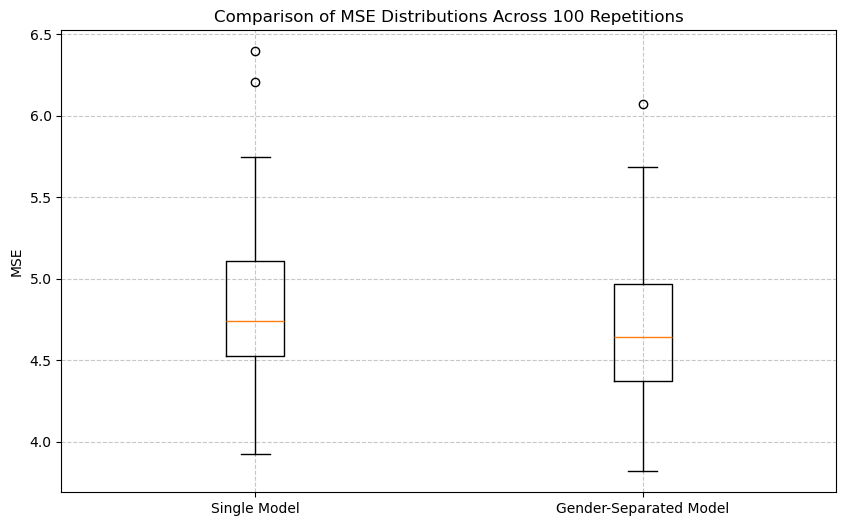

In [ ]:

# Visualization
plt.figure(figsize=(10,6))
box_data = [MSE_whole, MSE_gender]
box_labels = ['Single Model', 'Gender-Separated Model']

plt.boxplot(box_data, tick_labels=box_labels)
plt.ylabel("MSE")
plt.title("Comparison of MSE Distributions Across 100 Repetitions")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


# Conclusion

After conducting 100 repeated experiments, the mean and standard deviation of the Mean Squared Error (MSE) were computed, yielding the following results:

- **Single Linear Regression Model:** Mean MSE = $4.8273 \pm 0.5152$  
- **Gender-Separated Linear Regression Model:** Mean MSE = $4.6750 \pm 0.4175$  

Both the mean MSE and its standard deviation decreased, indicating the model has slightly improved.

